# Exercise 03

## Exercise H3.1: Multilayer Perceptrons (MLP)

### a, b) Creating 50 MLPs and plotting them

**Importing libraries & Defining the classes**

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

class Weights:
    """
    Weights generation class, works by constructing
    [
        [
            hidden_to_x0,
            hidden_to_x1,
        ],
        [
            output_to_hidden
        ]
    ]
    where hidden_to_x0, hidden_to_x1 and output_to_hidden are numpy arrays.
    """
    
    def generate_random(self):
        """
        Generates weights as following:
            - Array of weights between hidden layer and input layer:
                - hidden nodes <=> x0 (from -2 to 2 uniformly distributed)
                - hidden nodes <=> x1 (from 0 to 2 normally distributed)
            - Array of weights between output layer and hidden layer:
                - output node <=> hidden nodes (from 0 to 1 normally distributed)
        Note that x0 is the bias

        Returns array(size 2) of arrays containing numpy vectors (each of size 10)
        """
        output_to_hidden = np.random.normal(0, 1, 10)
        hidden_to_x1 = np.random.normal(0, 2, 10)
        hidden_to_x0 = np.random.uniform(-2, 2, 10)
        return [[hidden_to_x0, hidden_to_x1], [output_to_hidden]]
        

class MLP:
    """
    MLP class that takes a confiugration (weights)
    and evaluates the output y(x) based on given x.
    """
    def __init__(self, weights):
        self.weights = weights
        self.size = len(weights[0][0])
    
    def transfer_function(self, h_input):
        """
        Evaluates the h_input

        Returns tanh(h_input)
        """
        return np.tanh(h_input)
    
    def evaluate_output(self, input_data):
        """
        Given input_data x, evaluates the output of the neuron
        using the weights of the MLP.
         - Weights of hidden layer <=> x:      self.weights[0][1]
         - Weights of hidden layer <=> bias:   self.weights[0][0]
         - Weights of output layer <=> hidden: self.weights[1][0]
        
        Returns a scalar output.
        """
        h = np.dot(self.weights[0][1], input_data) - self.weights[0][0]
        output = np.dot(self.weights[1][0], np.tanh(h))
        return output
    
    def evaluate_multiple(self, multiple_inputs):
        """
        Evaluates multiple inputs by running self.evaluate_output() on each input_value
        
        Returns array of scalar outputs
        """
        return [self.evaluate_output(input_value) for input_value in multiple_inputs]

# Testing the network
weights = Weights().generate_random()
MLP(weights).evaluate_output(-2)

-1.6058272563829281

**Initiating 50 weights sets and plotting data**

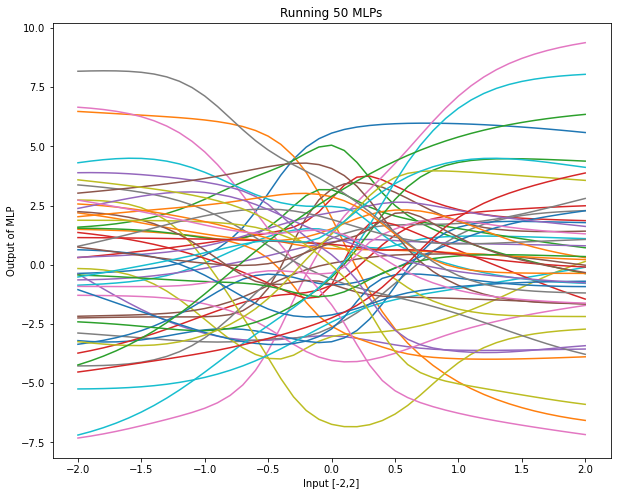

In [96]:
NO_OF_MLPS = 50

def plot_results(inputs, all_results):
    plt.figure(figsize=(10,8))

    for result_set in all_results:
        plt.plot(inputs, result_set)

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Input [-2,2]")
    plt.ylabel("Output of MLP")
    plt.title("Running 50 MLPs")
    # plt.legend()
    plt.show()


inputs = list(np.arange(-2,2.1, 0.1))
fifty_weights = [Weights().generate_random() for _ in range(NO_OF_MLPS)]
all_results = [MLP(weights).evaluate_multiple(inputs) for weights in fifty_weights]

plot_results(inputs, all_results)

### c) Using different initialization scheme

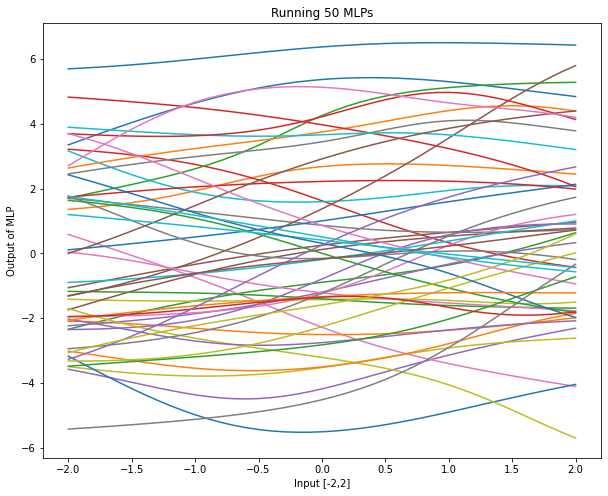

In [97]:
class DifferentWeights(Weights):
    """
    A different Weights class that inherits from base Weights class
    """
    def generate_random(self):
        output_to_hidden = np.random.normal(0, 1, 10)
        hidden_to_x1 = np.random.normal(0, 0.5, 10)
        hidden_to_x0 = np.random.uniform(-2, 2, 10)
        return [[hidden_to_x0, hidden_to_x1], [output_to_hidden]]

fifty_other_weights = [DifferentWeights().generate_random() for _ in range(NO_OF_MLPS)]
all_results = [MLP(weights).evaluate_multiple(inputs) for weights in fifty_other_weights]

plot_results(inputs, all_results)

### d) Calculating MSE

In [67]:
np.multiply(np.array([1,2,3]), 4)
np.tanh([1,2,3]), np.tanh(1), np.tanh(2)

(array([0.76159416, 0.96402758, 0.99505475]),
 0.7615941559557649,
 0.9640275800758169)

----------------------------------------------------------------
## Exercise H3.2: MLP Regression

### A) Intialization